In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import copy

import partitioning

In /anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda/envs/py37_tenso

In [3]:
# Load encodings
file_path = 'datasets/encoding_data/encodings_celebA_1000.pickle'
raw_data = pickle.loads(open(file_path, "rb").read())
data = [list(d['encoding']) for d in raw_data]

[Note] For k-member clustering, this algorithm is highly in-efficent. Especially for around 1000 datapoints and k=20, it requires around 350 seconds to complete. For more details on each iteration, enable: verbose=True. This is NOT an implementation issue, it is the disadvantage of greedy-type algorithm. The main reason is that the 'find_best_record' function (please see original paper [1] for mode details) loops for the whole remaining data to find a best record. For example, some of the first rounds, the number of remaining data is apporiximately the size of whole dataset.

[1] Byun, J.W., Kamra, A., Bertino, E. and Li, N., 2007, April. Efficient k-anonymization using clustering techniques. In International Conference on Database Systems for Advanced Applications (pp. 188-200). Springer, Berlin, Heidelberg.

In [33]:
#k-member clustering
input_data = copy.deepcopy(data)

clusters_kmember = partitioning.kmember_partition(input_data, 20, verbose=False)

#OKA 
input_data = copy.deepcopy(data)
clusters_oka = partitioning.oka_partition(input_data, 20)

Time for finding this cluster:  9.80870509147644
Current remaining datapoints:  981
Time for finding this cluster:  9.635993719100952
Current remaining datapoints:  961
Time for finding this cluster:  9.320257663726807
Current remaining datapoints:  941
Time for finding this cluster:  9.193769216537476
Current remaining datapoints:  921
Time for finding this cluster:  9.023977756500244
Current remaining datapoints:  901
Time for finding this cluster:  8.753137826919556
Current remaining datapoints:  881
Time for finding this cluster:  8.562746286392212
Current remaining datapoints:  861
Time for finding this cluster:  8.40327262878418
Current remaining datapoints:  841
Time for finding this cluster:  8.172425270080566
Current remaining datapoints:  821
Time for finding this cluster:  7.953189373016357
Current remaining datapoints:  801
Time for finding this cluster:  7.789581775665283
Current remaining datapoints:  781
Time for finding this cluster:  7.65743350982666
Current remaining 

[[[-0.15244948863983154,
   0.08842145651578903,
   0.1065533310174942,
   -0.08821999281644821,
   -0.05601007491350174,
   -0.03870665282011032,
   -0.06930151581764221,
   -0.22660326957702637,
   0.14361870288848877,
   -0.07496847957372665,
   0.2507654130458832,
   -0.05933184176683426,
   -0.23849625885486603,
   -0.03517711162567139,
   -0.093321293592453,
   0.2307342290878296,
   -0.21367141604423523,
   -0.1527917981147766,
   -0.0241110697388649,
   0.06631064414978027,
   0.12490665167570114,
   -0.03384467959403992,
   0.009767659939825535,
   0.08211244642734528,
   -0.10724665969610214,
   -0.2668607532978058,
   -0.1200106218457222,
   -0.07909120619297028,
   -0.050810039043426514,
   -0.07691200077533722,
   0.040459174662828445,
   -0.02167758159339428,
   -0.1734510213136673,
   0.0240139402449131,
   -0.00992049090564251,
   0.11023261398077011,
   0.022544026374816895,
   -0.23395918309688568,
   0.054136015474796295,
   -0.0016031237319111824,
   -0.351571083068

In [7]:
# Convert result type
labels_kmember = partitioning.cluster_member_to_index(clusters_kmember, data)
labels_oka = partitioning.cluster_member_to_index(clusters_oka, data)


# Calculate statistics
df_kmember = partitioning.cluster_stats(data, labels_kmember)
df_oka = partitioning.cluster_stats(data, labels_oka)

# Update labels
df_kmember['strategy'] = 'knn variance'
df_kmember['method'] = 'kmember'

df_oka['strategy'] = 'k-means variance'
df_oka['method'] = 'OTP'


# Combine results
df_related = df_kmember.append(df_oka, ignore_index = True)
list(df_related.columns.values)

# Rename the columns
df_related.columns = ['label', 'size', 'min dist', 'max dist', 'mean dist', 'mean silhouette', 'strategy', 'method']
df_related

# Re-order the column 
df_related_ordered = df_related[ ['label', 'max dist', 'min dist', 'mean dist', 'size', 'mean silhouette', 'method', 'strategy'] ]

#Calculate the mean silhouette based for the whole method
df_related_ordered.loc[df_related_ordered.method == 'kmember', 'mean silhouette'] = df_related_ordered.loc[df_related_ordered.method == 'kmember', 'mean silhouette'].mean()
df_related_ordered.loc[df_related_ordered.method == 'OTP', 'mean silhouette'] = df_related_ordered.loc[df_related_ordered.method == 'OTP', 'mean silhouette'].mean()


In [8]:
# Load other results
df = pd.read_csv('Outputs/dlib_clt.csv')
# Rename columns
df.columns = ['label', 'max dist', 'min dist', 'mean dist', 'size', 'mean.cl.sil', 'mean silhouette', 'method', 'strategy']
# Select important columns
df_selected = df[ ['label', 'max dist', 'min dist', 'mean dist', 'size', 'mean silhouette', 'method', 'strategy'] ]


# Selecting and correct some names

df_hier_strategy = df_selected[df_selected.strategy == 'Hierarchical partition']
# Select only three methods
df_hier_strategy_methods = df_hier_strategy.loc[df_hier_strategy['method'].isin(['average', 'complete', 'ward.D'])]
df_hier_strategy_methods.strategy = 'hierarchical partition' # rename
df_hier_strategy_methods.loc[df_hier_strategy_methods.method == 'ward.D', 'method'] = 'ward' # rename

df_knn_strategy = df_selected[df_selected.strategy == 'Nearest Neighbors']
# Select two methods
df_knn_strategy_methods = df_knn_strategy.loc[df_knn_strategy['method'].isin(['random', 'maxd'])]
df_knn_strategy_methods.strategy = 'knn variance' # rename
df_knn_strategy_methods.loc[df_knn_strategy_methods.method == 'random', 'method'] = 'k-same' # rename
df_knn_strategy_methods.loc[df_knn_strategy_methods.method == 'maxd', 'method'] = 'max dist' # rename

df_elki = df_selected[df_selected.strategy == 'Kmeans partition']
# Select two methods
df_elki = df_elki.loc[df_elki['method'].isin(['elki', 'random'])]
df_elki.strategy = 'k-means variance' # rename


/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/pandas/core/generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
# Concat all the results above
df_final = pd.concat([df_hier_strategy_methods, df_elki, df_knn_strategy_methods, df_related_ordered], ignore_index=True, sort =False)

# Select only 4 columns for the figures
df_extract = df_final[['max dist', 'min dist', 'mean dist', 'method','strategy']]


In [13]:
# Save this result
df_final.to_pickle('Outputs/df_final.pickle')
df_extract.to_pickle('Outputs/df_extract.pickle')

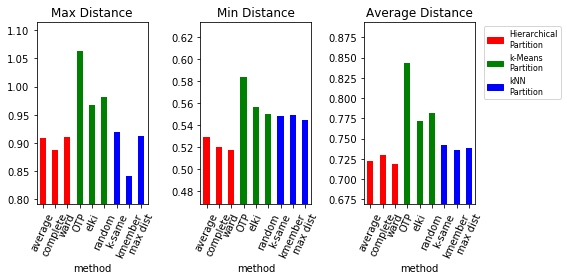

In [10]:
# Draw the bar-graph
# import matplotlib.patches as mpatches
dist_stats = df_extract.groupby(['strategy', 'method']).mean()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,4), sharey=False)
plt.style.use('default')
colors = {'hierarchical partition': 'r', 'k-means variance': 'g','knn variance': 'b' }
titles = ['Max Distance', 'Min Distance','Average Distance']
for key, ax, title in zip(list(dist_stats), axes.flatten(), titles):
    #print(key)
    dist_stats[key].plot.bar(ax=ax, 
                             color=[ colors[i] for i in dist_stats[key].reset_index()['strategy'] ], 
                             legend=False, 
                             #hatch = '..',
                             #sharey=True
                             )
    
    ax.set_ylim([min(dist_stats[key].values) - .05, max(dist_stats[key].values) + .05])
    ax.set_xticklabels(list(dist_stats[key].index.get_level_values(level=1)))
    ax.tick_params(axis='x', rotation=65)
#     ax.axis["bottom"].major_ticklabels.set_axis_direction("left")
    ax.set_xlabel('method')
    ax.set_title(title)
HP = mpatches.Patch(color='r', label='Hierarchical\nPartition')
KP = mpatches.Patch(color='g', label='k-Means\nPartition')
KN = mpatches.Patch(color='b', label='kNN\nPartition')
plt.legend(handles=[HP,KP,KN],bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 8})
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# plt.xticks(rotation=40)
plt.tight_layout() 
# plt.savefig('clustering_all_dists.pdf',dpi=300, bbox_inches = "tight")
plt.show()

     mean silhouette    method                strategy
0           0.008407   average  hierarchical partition
51         -0.001343  complete  hierarchical partition
102         0.014702      ward  hierarchical partition
153        -0.032708    random        k-means variance
204        -0.028015      elki        k-means variance
255        -0.009459    k-same            knn variance
306        -0.004924  max dist            knn variance
357        -0.009477   kmember            knn variance
407        -0.057135       OTP        k-means variance
['hierarchical partition', 'k-means variance', 'knn variance']


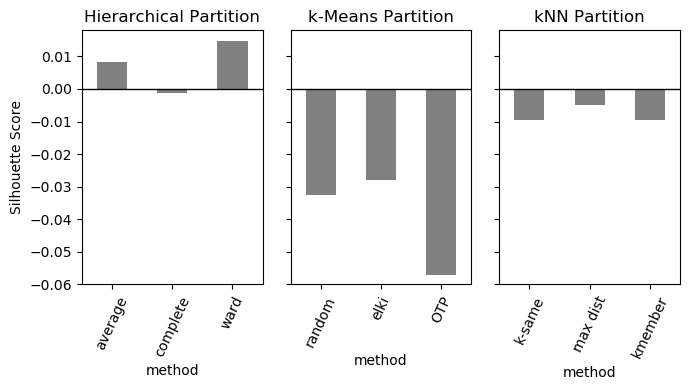

In [11]:
# Draw bar-plot for mean Silhouette

df_extract1 = df_final[['mean silhouette', 'method', 'strategy']]
df_extract1 = df_extract1.drop_duplicates()
print(df_extract1)
# u = df_extract.strategy.unique()
u = ['hierarchical partition','k-means variance', 'knn variance']
print(u)
fig, axes = plt.subplots(ncols=len(u), figsize=(7,4))
plt.style.use('default')
titles = ['Hierarchical Partition', 'k-Means Partition', 'kNN Partition']
for strategy, ax, title in zip(u, axes, titles):
    df_extract1[df_extract1.strategy==strategy].plot.bar(x="method", title=title, color = 'gray', ax =ax ,sharey=True)
    ax.set_ylim([-0.06, 0.018])
    ax.tick_params(axis='x', rotation=65)
#     ax.grid(linestyle='-.', linewidth=0.5, alpha=0.5)
    ax.axhline(y=0, color='k', linestyle='-', linewidth = 1)
    ax.legend().set_visible(False)
    ax.set_ylabel('Silhouette Score')
plt.tight_layout()  
# plt.savefig('clustering_sil.pdf',dpi=300, bbox_inches = "tight")
plt.show()

[Improvement Space] A new version of HP

This is faster version of Hierarchical Partitioning (Why do I invent this name, don't know!). This is 1000 times faster. The idea is to calculate the linkage matrix one, then do tree manipulations, no extra re-calcualation of the tree is needed. Currently, there is one problem is that we only have lower bound for the cluster size, no upper bound or fixed size dictation. 

In [6]:
len(data)

1001

In [14]:
import time
start_time = time.time()
cluster = partitioning.hp_v2(data,k=4)
print('Finished in: ', time.time()-start_time )

Finished in:  0.25191473960876465


This is the cluster size after clustering (or partitioning, why partitioning, don't know!). We see that even though no upper-bound is given, the cluster size ranging from 4-6. And two outliers!!! Need to investigate these ones.

In [15]:
cluster = pd.DataFrame({'cluster':cluster})
cluster['cluster'].value_counts()

 191    6
 179    6
 190    6
 137    6
 139    6
       ..
 107    4
 108    4
 111    4
 112    4
-1      2
Name: cluster, Length: 221, dtype: int64

In [5]:
# Testing long-line break
import pandas as pd
a = pd.DataFrame({'a':[1], 'b': [2]}